In [2]:
#dumb notebook to plot AMOC

import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
from glob import glob

# exps = ['tu7d', 'T009', 'T010']
exps = ['T009', 'TN11', 'LC06']

filz_amoc = dict()
filz_nemo = dict()
filz_ice = dict()

for exp in exps:
    if exp == 'T009':
        cart = f'/ec/res4/scratch/ccff/ece4/{exp}/output/nemo/'
    elif exp == 'LC06':
        cart = f'/ec/res4/scratch/ecme3497/ece4/{exp}/output/nemo/'
    else:
        cart = f'/ec/res4/scratch/ccpd/ece4/{exp}/output/nemo/'
    filz = cart + f'{exp}_oce_1m_diaptr3d_*.nc'
    filz_amoc[exp] = sorted(glob(filz))

    filz = cart + f'{exp}_oce_1m_T_*.nc'
    filz_nemo[exp] = sorted(glob(filz))

    fliz = cart + f'{exp}_ice_1m_*.nc'
    filz_ice[exp] = (sorted(glob(fliz)))

def amoc_plot(expname, nyear=30):

    gigi = xr.open_mfdataset(filz_amoc[expname][:-1])
    amoc = gigi['msftyz']
    amoc = amoc.compute()
    start = len(amoc.time_counter) - nyear if len(amoc.time_counter) > nyear else 0
    amoc_mean = amoc.isel(time_counter = slice(start, -1)).mean('time_counter')
    amoc_mean = amoc_mean.squeeze()
    amoc_mean.sel(basin = 2).plot.contourf(x = 'nav_lat', y = 'depthw', ylim = (3000, 0), levels = np.arange(-17, 17, 2))
    plt.title(f'AMOC {expname} (Sv) mean last {nyear} years')

def amoc_timeseries(expname):

    gigi = xr.open_mfdataset(filz_amoc[expname][:-1])
    amoc = gigi.sel(depthw = slice(500,2000), basin = 2)['msftyz']
    amoc = amoc.where((gigi['nav_lat']>38) & (gigi['nav_lat']<50)).compute()
    amoc = amoc.resample(time_counter = 'YS').mean()
    amoc_max = amoc.max(dim = ['depthw', 'y'])
    amoc_max.plot(ylim = (5, 20))
    plt.title(f'AMOC max {expname} (Sv) timeseries')

#filz_amoc['TN09'][-1]

Text(0.5, 1.0, 'Arctic average sea ice concentration TN09')

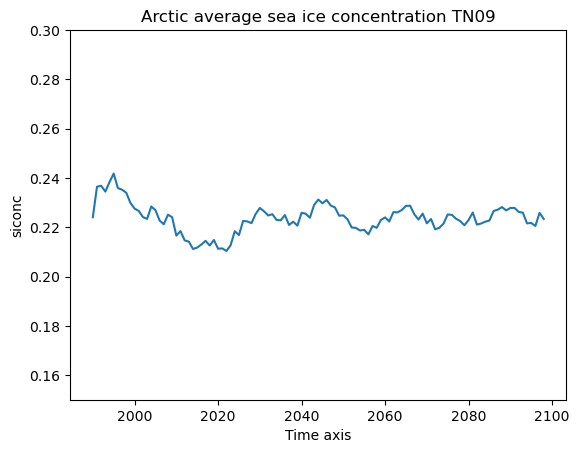

In [2]:
gigi = xr.open_mfdataset(filz_ice['TN09'][:-1])
gigi['siconc'].where(gigi['nav_lat']>0).mean(dim=['x', 'y']).resample(time_counter='YS').mean().plot(ylim=(0.15,0.3))
plt.title('Arctic average sea ice concentration TN09')

Text(0.5, 1.0, 'Arctic average sea ice concentration T009')

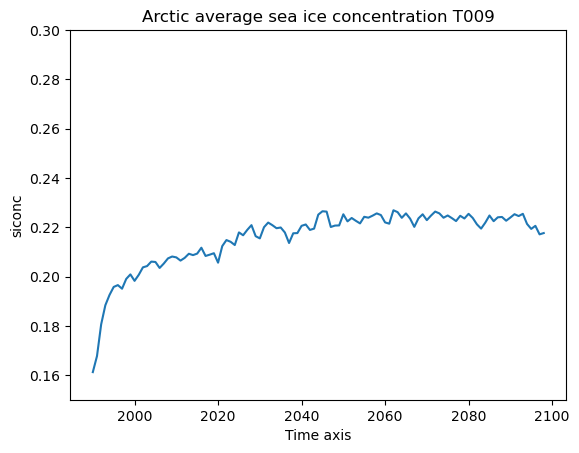

In [38]:
gigi = xr.open_mfdataset(filz_ice['T009'][:-1])
gigi['siconc'].where(gigi['nav_lat']>0).mean(dim=['x', 'y']).resample(time_counter='YS').mean().plot(ylim=(0.15,0.3))
plt.title('Arctic average sea ice concentration T009')

In [ ]:
#gigi = xr.open_mfdataset(filz_amoc['TN09'][:-1])
#amoc = gigi.sel(depthw = slice(500,2000), basin = 2)['msftyz'].compute()
#amoc = amoc.where((gigi['nav_lat']>38) & (gigi['nav_lat']<50))

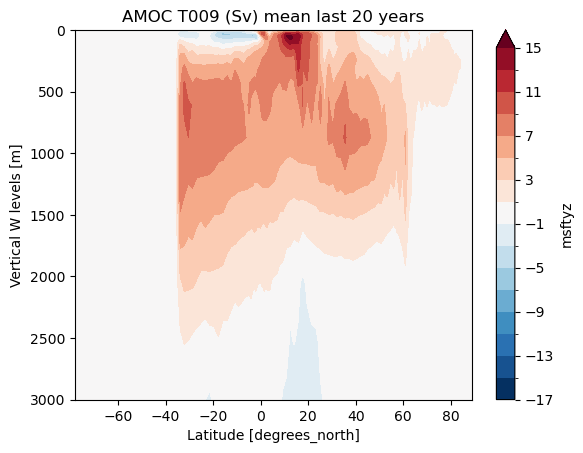

In [3]:
amoc_plot('T009', nyear=20)


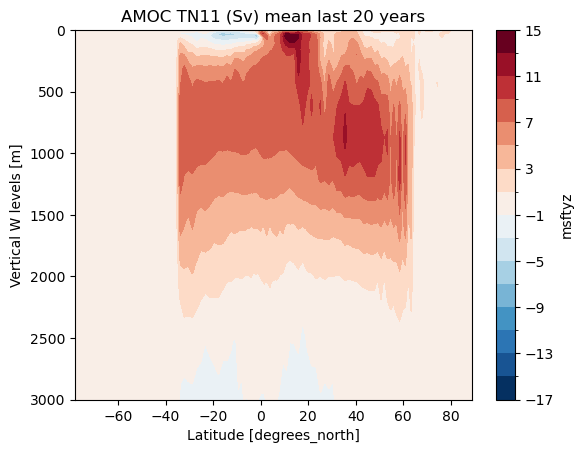

In [5]:
amoc_plot('TN11', nyear=20)

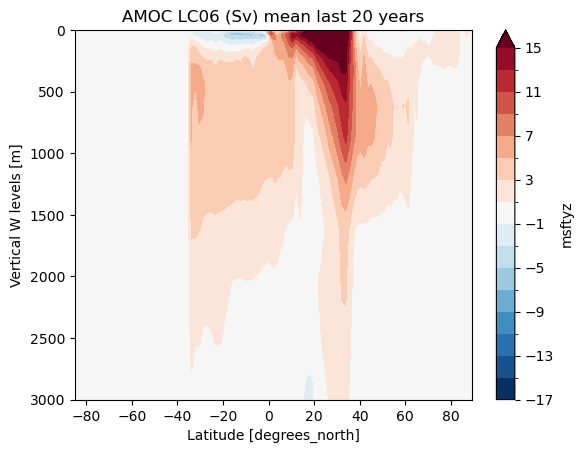

In [4]:
amoc_plot('LC06', nyear=20)

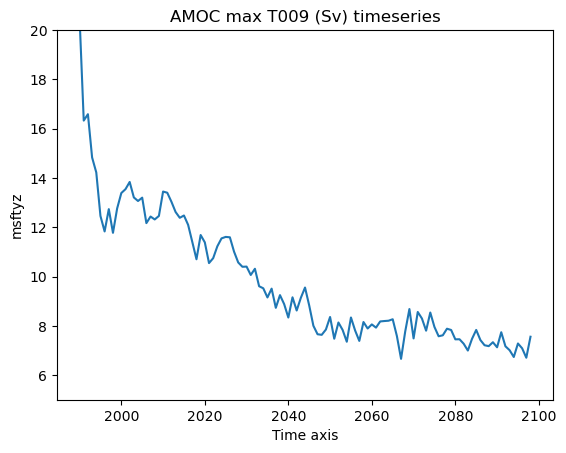

In [27]:
amoc_timeseries('T009')

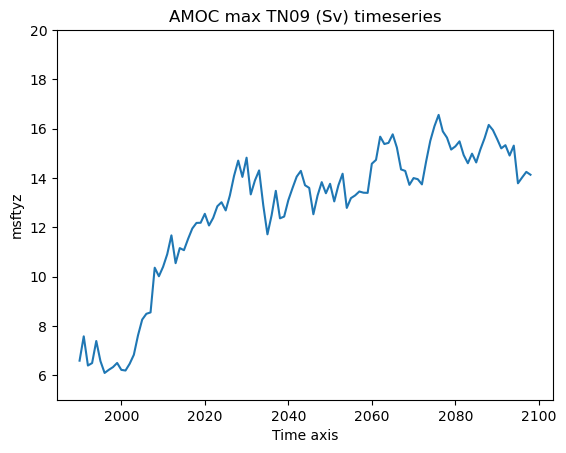

In [8]:
amoc_timeseries('TN09')